In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

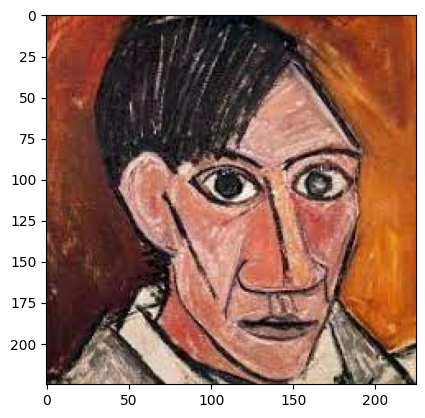

In [15]:
img = cv2.cvtColor(cv2.imread("../data/Picasso.jpeg"), cv2.COLOR_BGR2RGB)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)
plt.show()

In [16]:
def objective_function(vec,out, img):
    # blank mask for drawing the shapes
    shapes = np.zeros_like(img, np.uint8)
    t = out.copy()
    # draw circle
    vec[2] = np.abs(vec[2])
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    t[mask] = cv2.addWeighted(t, 1-vec[6], shapes, vec[6], 0)[mask]

    # plt.imshow(t)
    # plt.show()

    #bt = t[: ,: ,0]
    #gt = t[: ,: ,1]
    #rt = t[: ,: ,2]
    #bImg = img[:,:,0]
    #gImg = img[:,:,1]
    #rImg= img[:,:,2]
    # print("(",vec[3],vec[4],vec[5],")")
    return np.sum(np.abs(np.subtract(img,t))) 

    #b  = f1_score(bImg, bt, average='micro')
    #g =  f1_score(gImg, gt, average='micro')
    #r =  f1_score(rImg, rt, average='micro')
    #return np.average((r, g, b)) 
    
out = np.zeros_like(img)
objective_function([100,90, 8, 0,0,255,0.3], out, img) #X,Y,r,R,G,B,alpha

14756606

In [17]:
def draw_circle(vec, out, print = False):
    shapes = np.zeros_like(out, np.uint8)

    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    out[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]

    if print:
        plt.imshow(out)
        plt.show()

In [18]:
w,h,c = img.shape

bounds = [
    [0,w],# x
    [0,h], # y
    [5, (w + h)//4], # radius
    [0,255], # R
    [0,255], # G
    [0,255], # B
    [0.6,1], # alpha
]

nIter = 500

# Our Differential Evolution

In [19]:
from differential_evolution import differential_evolution

0 {'P': array([ 7.99961980e+02,  5.75464596e+02,  8.46620124e+02,  1.16431343e+02,
        4.63212316e+01, -1.05880333e+04,  1.22398074e+00]), 'nIt': 800, 'fun': 11631594, 'nFev': 60075}


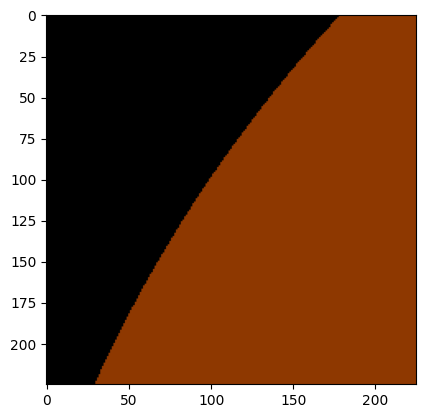

100 {'P': array([ 1.20803138e+02,  1.88002367e+02,  4.03695800e+00,  4.27511009e+03,
        8.52142689e+02,  1.15951128e+04, -1.86397935e+00]), 'nIt': 800, 'fun': 7139991, 'nFev': 60075}


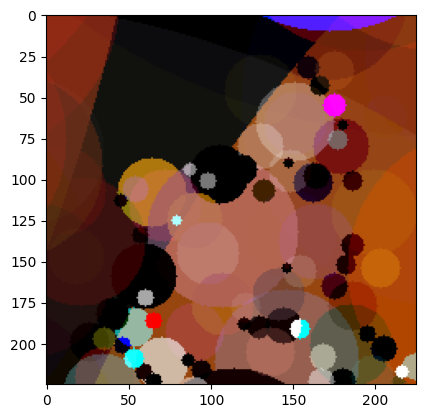

200 {'P': array([1.07452371e+02, 9.01576513e+01, 2.23618448e+00, 1.21022326e+03,
       3.20683926e+02, 5.23574179e+02, 3.76926819e-01]), 'nIt': 800, 'fun': 6552307, 'nFev': 60075}


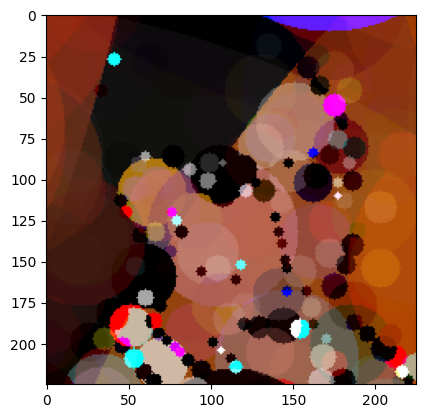

300 {'P': array([ 65.09753401, 182.17726467,   2.67342786, 110.24793736,
       185.54444974, 444.0751204 ,   0.67489743]), 'nIt': 800, 'fun': 6217240, 'nFev': 60075}


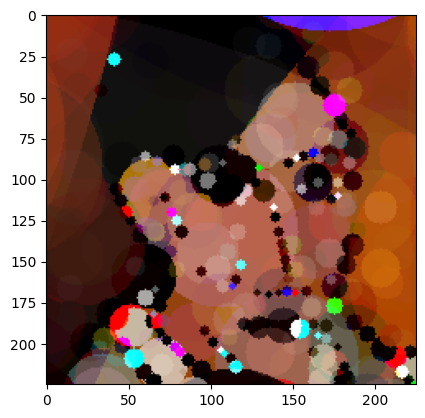

400 {'P': array([8.73316765e+01, 1.41484600e+02, 2.26376650e+00, 8.77846310e+01,
       6.30138420e+02, 6.00503998e+03, 1.46574494e+00]), 'nIt': 800, 'fun': 5993089, 'nFev': 60075}


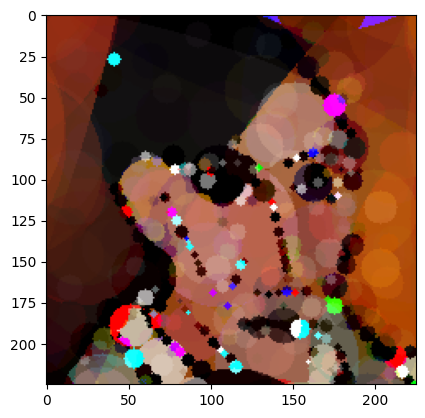

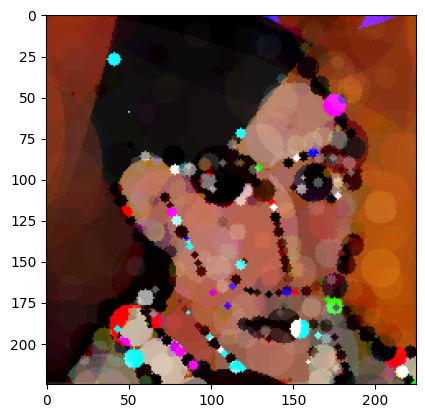

In [20]:
out = np.zeros_like(img)
for i in range(nIter):
    r = differential_evolution(objective_function, bounds, args = (out, img), popSize=75, cR = 0.4, nGen = 800) #The smaller cR is, it takes less risks
    if i % (nIter // np.min((nIter, 5))): 
        draw_circle(r["P"], out)
    else:
        print(i, r)
        draw_circle(r["P"], out, True)
plt.imshow(out)

# Scipy Differential Evolution

In [21]:
from scipy.optimize import differential_evolution

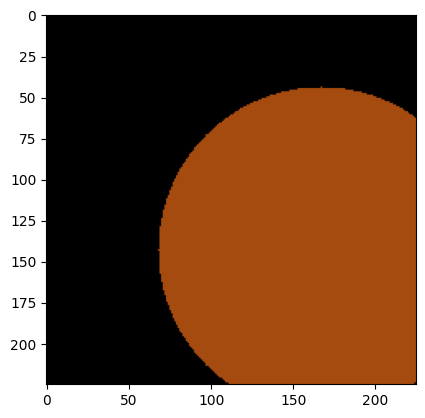

0      fun: 11790202.0
 message: 'Optimization terminated successfully.'
    nfev: 15408
     nit: 21
 success: True
       x: array([167.78121794, 143.50810031,  99.50123987, 247.2535243 ,
       111.83179723,  22.67954061,   0.67169872])


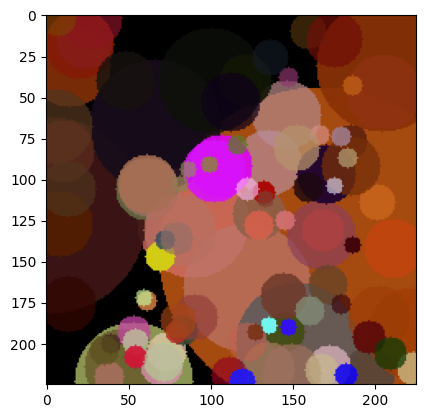

100      fun: 8012584.0
 message: 'Optimization terminated successfully.'
    nfev: 6308
     nit: 8
 success: True
       x: array([122.96801114, 106.98620491,   7.84438449, 250.65283178,
       184.46298148, 236.49987594,   0.64919907])


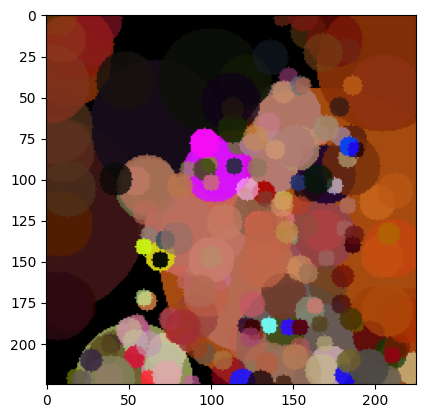

200      fun: 7503713.0
 message: 'Optimization terminated successfully.'
    nfev: 6308
     nit: 8
 success: True
       x: array([154.46069241, 190.22711258,   5.55967578,  84.6521975 ,
         0.51685949,  19.65781776,   0.96259663])


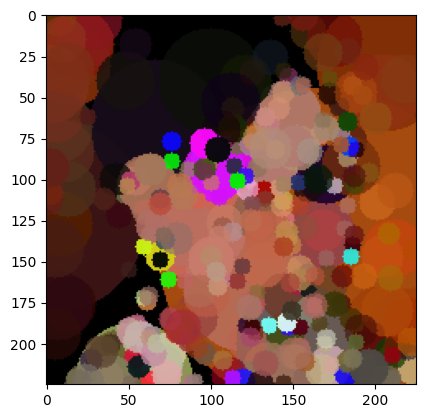

300      fun: 7189974.0
 message: 'Optimization terminated successfully.'
    nfev: 7008
     nit: 9
 success: True
       x: array([163.18197703, 177.81214678,   8.29980718, 176.13533369,
        97.95420527,  94.38276695,   0.6944478 ])


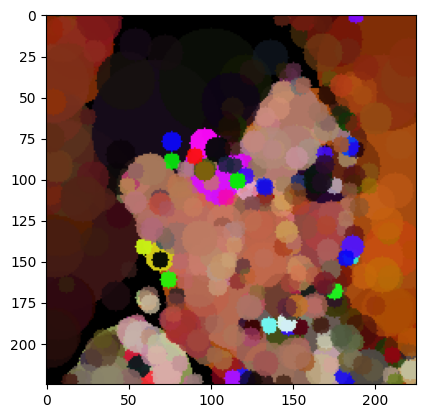

400      fun: 6967688.0
 message: 'Optimization terminated successfully.'
    nfev: 6308
     nit: 8
 success: True
       x: array([ 92.41330724, 198.48478135,   7.8639616 , 163.78693813,
        71.67122604,  59.37233504,   0.72032027])


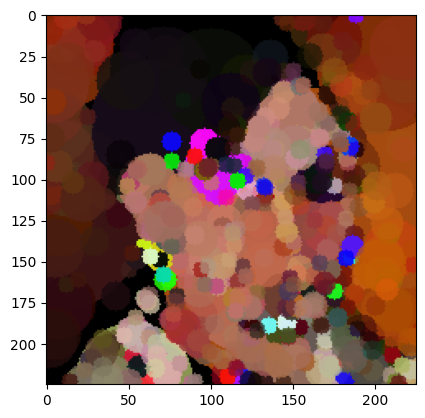

In [22]:
out = np.zeros_like(img)
for i in range(nIter):
    res = differential_evolution(objective_function, bounds, args=(out,img), popsize= 100)
    # plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    # plt.show()
    if i % (nIter // np.min((nIter, 5))): draw_circle(res.x, out)
    else:
        draw_circle(res.x, out, True)
        print(i, res)
plt.imshow(out)

# Project

## Recommendation

Work along *scipy*. The idea is to make the project behave as scipy does.

Start with something small and easy. With few details and an image of 200 x 200 approx.

## Individual

The individual is recommended to have:

- **x** - x coordinate value of the circle.

- **y** - y coordinate value of the circle.

- **r** - Radius of the circle, recommended value is (3 or something like that to half the image size).

- **Colors** - RGBA

    - Alpha is optional.

## How it works

This algorithm has to execute itself as many times as circles the image has.

Each execution will add a new circle that minimizes the difference between the image we're building and the target one.